<a href="https://colab.research.google.com/github/CamiloMezzano/Analisis.StartUps/blob/main/Proyecto_Personal_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Conjunto de datos**

* Financiamiento de empresas tecnológicas (desde 2020)


Este conjunto de datos contiene información actualizada sobre la financiación de empresas de tecnología en todo el mundo. Este conjunto de datos se puede utilizar para identificar tendencias recientes en empresas de tecnología y el espacio de inversión. El conjunto de datos contiene información de enero de 2020 y contiene información de financiación de más de 3500 empresas. Los atributos de los datos incluyen: nombre de la empresa, sitio web, etapa de financiamiento, fecha de financiamiento, cantidad de financiamiento en dólares estadounidenses y la región. Para obtener más información sobre los valores de los campos individuales, consulte los metadatos de columna.

**Ideas de exploración**


* ¿Cómo evoluciona el ecosistema de financiación a lo largo del tiempo?
* ¿Las regiones de la empresa juegan un papel importante en la financiación?
* ¿Qué categorías son las preferidas por los inversores para la financiación?
* ¿Qué categorías son las preferidas por los inversores para la financiación?
* ¿Cuántos fondos en diferentes categorías obtienen las empresas de tecnología en general?

https://www.kaggle.com/datasets/shivamb/tech-company-fundings-2020-onwards


In [ ]:
# Para crear un DataSet alternativo

# X = pd.read_csv('/content/tech_fundings_2.0.csv')
# df = X[['Colum 1', 'Column 2']]
# df.head()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import seaborn as sns
import datetime
from sklearn.tree import DecisionTreeClassifier
set_config(display='diagram')

In [ ]:
df = pd.read_csv('/content/tech_fundings.csv')
df.head()

,Company,Website,Region,Country,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,Internxt,https://internxt.com/,Europa,Spain,Blockchain,278940,Seed,Jan-20
1,Dockflow,https://dockflow.com,Europa,Belgium,Logistics,292244,Seed,Jan-20
2,Buck.ai,https://buck.ai/,America del Norte,United States,Artificial Intelligence,300000,Seed,Jan-20
3,Prodsight,https://www.prodsight.ai,Europa,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20
4,Harvestr,http://harvestr.io/,Europa,France,B2B Software,650000,Angel,Jan-20


In [ ]:
#revisamos cantidad de columnas y filas
df.shape

(3461, 8)

In [ ]:
Tech_Companies = pd.read_csv('/content/tech_fundings.csv')
df = Tech_Companies[['Region', 'Vertical', 'Funding Amount (USD)', 'Funding Stage']]
df.head()

,Region,Vertical,Funding Amount (USD),Funding Stage
0,Europa,Blockchain,278940,Seed
1,Europa,Logistics,292244,Seed
2,America del Norte,Artificial Intelligence,300000,Seed
3,Europa,Artificial Intelligence,529013,Seed
4,Europa,B2B Software,650000,Angel


In [ ]:
#Revisamos la información de nuestra base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                3461 non-null   object
 1   Vertical              3461 non-null   object
 2   Funding Amount (USD)  3461 non-null   object
 3   Funding Stage         3461 non-null   object
dtypes: object(4)
memory usage: 108.3+ KB


In [ ]:
#Revisamos los faltantes
df.isna().sum()

Region                  0
Vertical                0
Funding Amount (USD)    0
Funding Stage           0
dtype: int64

In [ ]:
df.value_counts('Vertical')

Vertical
B2B Software               616
FinTech                    355
Cloud Computing            280
Artificial Intelligence    279
Blockchain                 231
                          ... 
CoWorking                    1
Events                       1
Enterprise Software          1
Design Software              1
Big Data                     1
Length: 85, dtype: int64

In [ ]:
df.value_counts('Region')

Region
America del Norte    2095
Europa                803
Asia                  407
LATAM                  60
Oceania                57
Africa                 39
dtype: int64

In [ ]:
df.value_counts('Funding Stage')

Funding Stage
Series A          939
Seed              832
Series B          647
Series C          460
Series D          249
Series E          134
Series F           62
Pre-Seed           56
Series G           26
Private Equity     21
Angel              13
Debt Financing     10
ICO                 5
Series H            4
Crowdfunding        3
dtype: int64

In [ ]:
df.describe().round()

,Region,Vertical,Funding Amount (USD),Funding Stage
count,3461,3461,3461,3461
unique,6,85,945,15
top,America del Norte,B2B Software,10000000,Series A
freq,2095,616,100,939


# **Explorar los datos (visualizaciones)**

<ipython-input-136-4c6cda58ce17>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


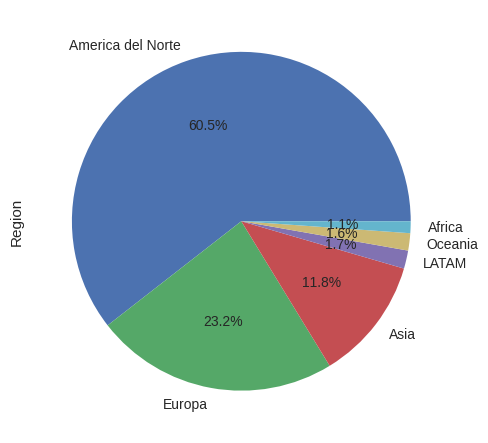

In [ ]:
plt.figure(dpi=100)
plt.style.use('seaborn')
df["Region"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-142-59ffaf212f43>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


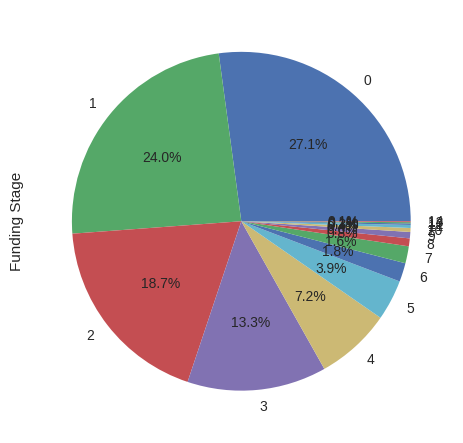

In [ ]:
plt.figure(dpi=100)
plt.style.use('seaborn')
df["Funding Stage"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# **Funding Stage**
* Series A =  0        
* Seed     =  1       
* Series B =  2     
* Series C =  3 
* Series D =  4      
* Series E =  5 
* Series F =  6
* Pre-Seed =  7
* Series G =  8
* Private Equity = 9
* Angel = 10
* Debt Financing = 11
* ICO    = 12
* Series H = 13
* Crowdfunding = 14

In [ ]:
df['Funding Stage'].replace({'Series A': 0, 'Seed': 1, 'Series B': 2, 'Series C': 3, 'Series D': 4, 'Series E': 5, 'Series F': 6, 'Pre-Seed': 7, 'Series G': 8, 'Private Equity': 9, 'Angel': 10, 'Debt Financing': 11, 'ICO': 12, 'Series H': 13, 'Crowdfunding': 14},inplace=True)
df['Funding Stage'].value_counts()

<ipython-input-138-609664681e22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Funding Stage'].replace({'Series A': 0, 'Seed': 1, 'Series B': 2, 'Series C': 3, 'Series D': 4, 'Series E': 5, 'Series F': 6, 'Pre-Seed': 7, 'Series G': 8, 'Private Equity': 9, 'Angel': 10, 'Debt Financing': 11, 'ICO': 12, 'Series H': 13, 'Crowdfunding': 14},inplace=True)


0     939
1     832
2     647
3     460
4     249
5     134
6      62
7      56
8      26
9      21
10     13
11     10
12      5
13      4
14      3
Name: Funding Stage, dtype: int64

# **Region**

* America del Norte =  0        
* Europa    =  1       
* Asia  =  2     
* LATAM  =  3 
* Oceania  =  4
* Africa  = 5


In [ ]:
df['Region'].replace({'America del Norte': 0, 'Europa': 1, 'Asia': 2, 'LATAM': 3, 'Oceania': 4, 'Africa': 5},inplace=True)
df['Region'].value_counts()

<ipython-input-139-76f5840ab6cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'].replace({'America del Norte': 0, 'Europa': 1, 'Asia': 2, 'LATAM': 3, 'Oceania': 4, 'Africa': 5},inplace=True)


0    2095
1     803
2     407
3      60
4      57
5      39
Name: Region, dtype: int64

# **Vizualización**

<ipython-input-140-2aafb823e60a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


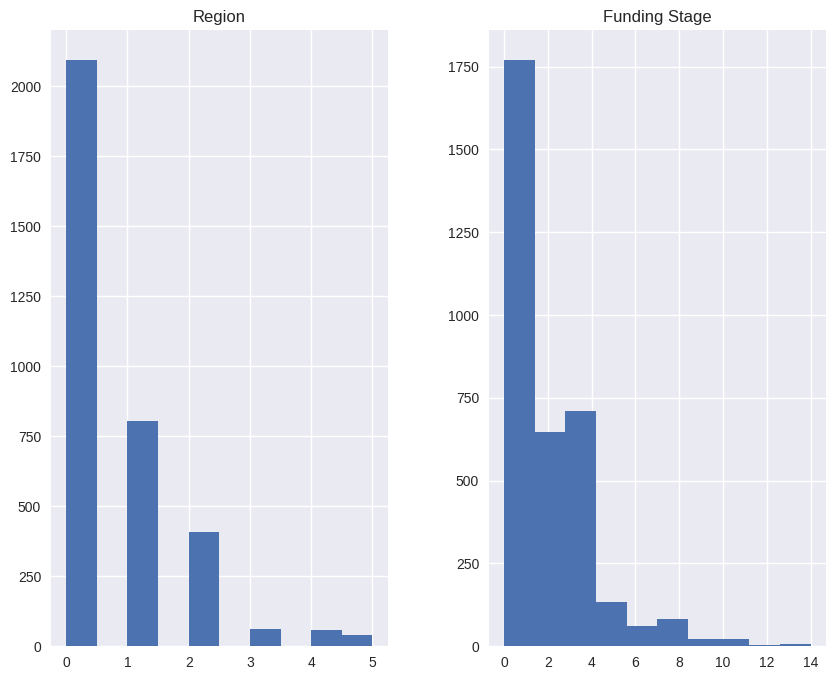

In [ ]:
plt.style.use('seaborn')
df.hist(figsize=(10, 8))
plt.show()

In [ ]:
#Mapa de calor para entender las variables 
plt.style.use('seaborn')
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(),cmap = annot = True)

plt.show()

In [ ]:
#Mapa de calor para entender las variables 
plt.style.use('seaborn')
plt.figure(figsize=(35, 20))

sns.heatmap(df.corr(),cmap = "Region", annot = True)

plt.show()

# **Creamos un modelo de predicción.**

In [ ]:
# Paso 1: aplicaremos TrainTestSplit. y realizaremos impresiones para revisar los datos

y = df['team1']
X = df.drop(columns = 'team1')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

# **Árboles de clasificación**

In [ ]:
scaler = StandardScaler()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.get_params()

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg_pipe = make_pipeline(scaler, logreg)